# WINE QUALITY PREDICTION USING RANDOM FOREST

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

sns.set_theme(style="darkgrid")
%matplotlib inline

## Import Dataset

In [2]:
data = pd.read_csv(
    r"E:\Msc_CS\DATA_SCIENCE_INTERN\project_deployment\Wine_dataset\winequality-white.csv",
    delimiter=";")

## Descriptive Analysis

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
# unique elements in the dataset
data.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [9]:
# check for duplicate rows
data.duplicated().sum()

937

In [10]:
# removing duplicate rows
data.drop_duplicates(keep='first', inplace=True)

In [11]:
# check for duplicate rows
data.duplicated().sum()

0

## Visualisation

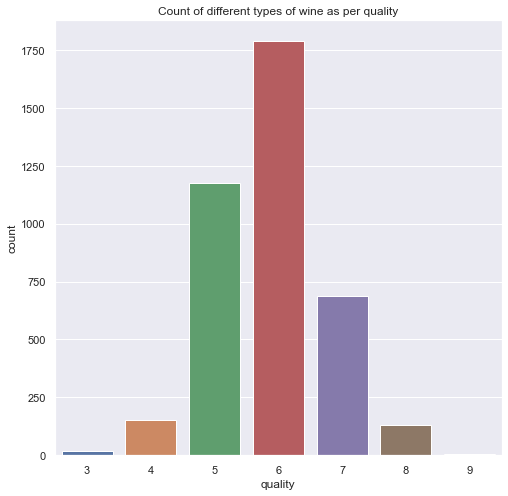

In [12]:
# type of quality available
plt.figure(figsize=(8, 8))
plt.title("Count of different types of wine as per quality")
sns.countplot(x='quality', data=data)
plt.show()

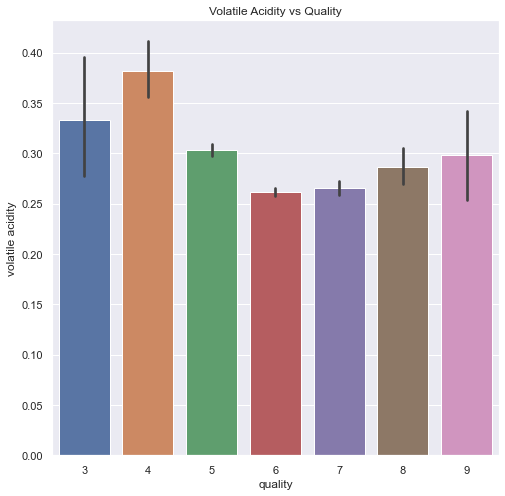

In [13]:
# volatile acidity vs Quality
plt.figure(figsize=(8, 8))
plt.title("Volatile Acidity vs Quality")
sns.barplot(x="quality", y="volatile acidity", data=data)
plt.title("Volatile Acidity vs Quality")
plt.show()

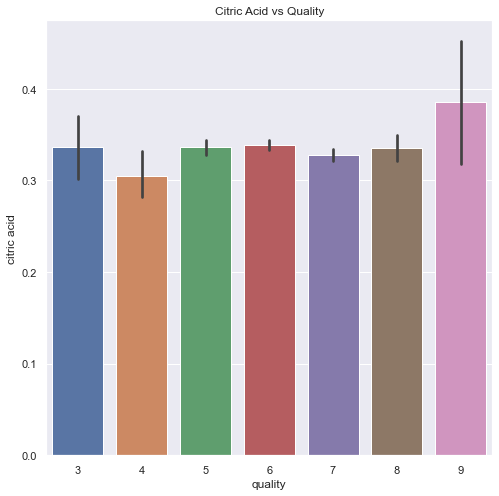

In [14]:
# citric acid vs Quality
plt.figure(figsize=(8, 8))
plt.title("Citric Acid vs Quality")
sns.barplot(x="quality", y="citric acid", data=data)
plt.title("Citric Acid vs Quality")
plt.show()

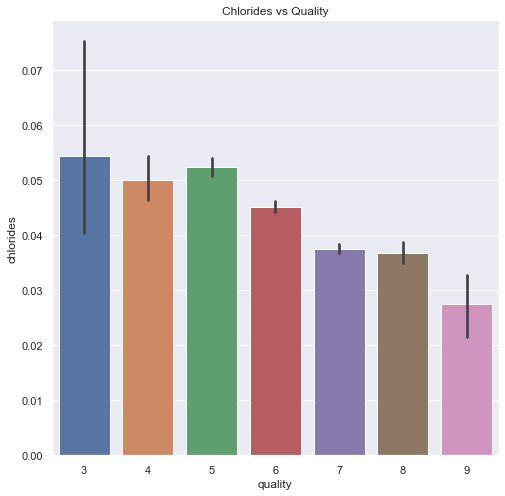

In [15]:
# Chlorides vs Quality
plt.figure(figsize=(8, 8))
plt.title("Chlorides vs Quality")
sns.barplot(x="quality", y="chlorides", data=data)
plt.title("Chlorides vs Quality")
plt.show()

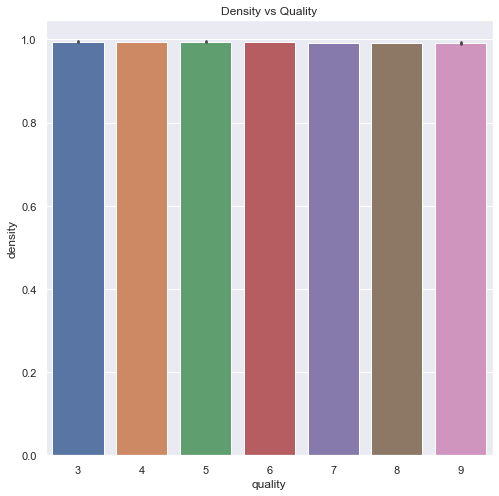

In [16]:
# Density vs Quality
plt.figure(figsize=(8, 8))
plt.title("Density vs Quality")
sns.barplot(x="quality", y="density", data=data)
plt.title("Density vs Quality")
plt.show()

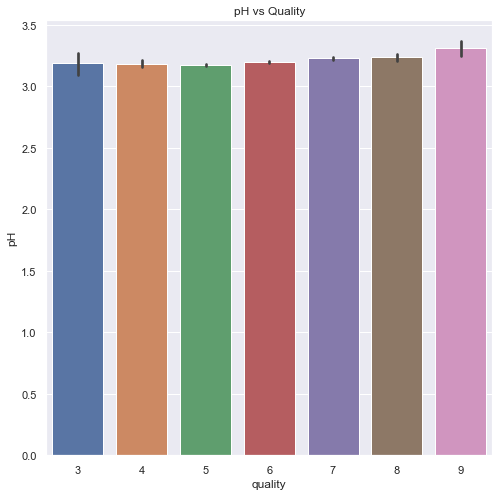

In [17]:
# pH vs Quality
plt.figure(figsize=(8, 8))
plt.title("pH vs Quality")
sns.barplot(x="quality", y="pH", data=data)
plt.title("pH vs Quality")
plt.show()

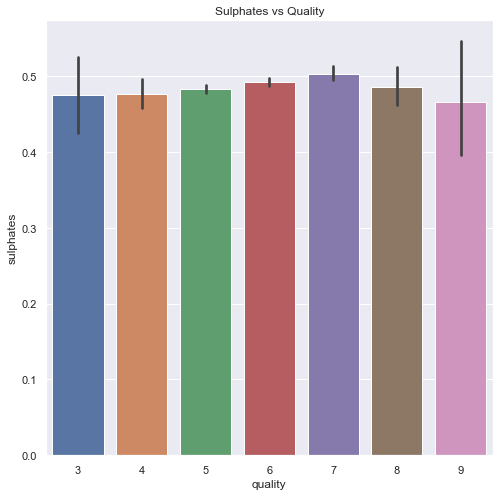

In [18]:
# Sulphates vs Quality
plt.figure(figsize=(8, 8))
plt.title("Sulphates vs Quality")
sns.barplot(x="quality", y="sulphates", data=data)
plt.title("Sulphates vs Quality")
plt.show()

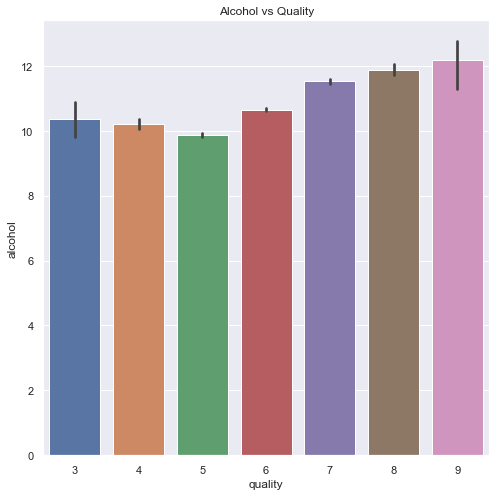

In [19]:
# Alcohol vs Quality
plt.figure(figsize=(8, 8))
plt.title("Alcohol vs Quality")
sns.barplot(x="quality", y="alcohol", data=data)
plt.title("Alcohol vs Quality")
plt.show()

In [20]:
# correlation

correlation = data.corr()

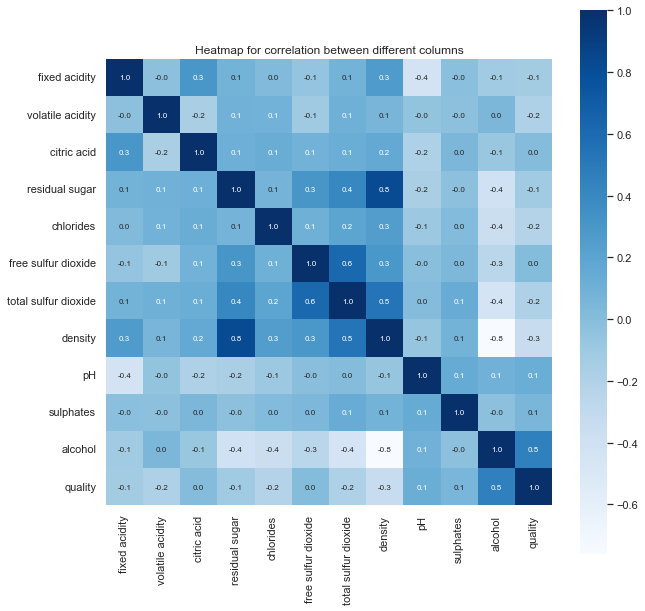

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation,
            cbar=True,
            square=True,
            fmt=".1f",
            annot=True,
            annot_kws={'size': 8},
            cmap='Blues')
plt.title("Heatmap for correlation between different columns")
plt.show()

## Model Building

### Split data into two (x and y)

In [22]:
x = data.drop(["quality"], axis=1)
y = data['quality']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)

### Random Forest Algorithm

In [24]:
classifier = RandomForestClassifier()

# training the model
classifier.fit(x_train, y_train)

# predictions for training data
training_predictions = classifier.predict(x_train)

# predictions for test data
test_predictions = classifier.predict(x_test)

### Accuracy Score

In [25]:
print(
    f"Training data accuracy : {accuracy_score(y_train, training_predictions)}"
)
print(f"Test data accuracy : {accuracy_score(y_test, test_predictions)}")

Training data accuracy : 1.0
Test data accuracy : 0.5519677093844602


### Confusion Matrix

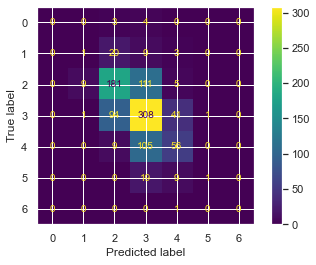

In [26]:
cf_matrix = confusion_matrix(y_test, test_predictions)
cm_display = ConfusionMatrixDisplay(cf_matrix).plot()

## Create Pickle File

In [29]:
import pickle
# open a file, where you ant to store the data
file = open('model.pkl', 'wb')

# dump information to that file
pickle.dump(classifier, file)

### Load pickle file

In [30]:
# import pickle
# pickle.dump(reg_lin1,open("linearmodel.pkl","wb"))
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model

RandomForestClassifier()